# <span style='color:#FE774C'>World Ocean Database </span> Example Notebook

In [1]:
import odp.geospatial as odp
import warnings

warnings.filterwarnings("ignore")

In [2]:
db = odp.Database()
db_plt = odp.PlotTools()

In [3]:
db.datasets

,schema,table,labels
name,,,
OBIS Biodiversity,raw_obis,occurrences,"[biology, ecosystem, occurrence, organisms]"
World Registry of Marine Species,raw_worms,taxa,"[biology, organisms, ecosystem]"
InterRidge hydrothermal vents,raw_interridge,vents,"[geology, vents]"
OceanLab,raw_oceanlabs,trondheim_buoy,"[physics, wind, atmosphere, pressure, temperat..."
vessel_emissions_2020_h3,vessel_emissions_map,emissions_map_2020_h3_month_class,"[human dimensions, estimated, emissions, human..."
vessel_emissions_2020_h4,vessel_emissions_map,emissions_map_2020_h4_month_class,"[human dimensions, estimated, emissions, human..."
vessel_emissions_2020_h5,vessel_emissions_map,emissions_map_2020_h5_month_class,"[human dimensions, estimated, emissions, human..."
lusedata,raw_ops_seafood,joined_salmon_lice_data,"[aquaculture, fish farms]"
World Seas IHO,raw_marineregions,world_seas_iho_v3,[marine boundaries]


## Pulling data - <span style='color:#FE774C'> **World Ocean Database** </span> -- Cast Information


#### Insert the name of the table you are interested in into the query function
In this case we are interseted in the World Ocean Database Casts

In [4]:
df_casts = db.query(
    "World Ocean Database Casts", date_from="2000-06-01", date_to="2000-08-30"
)

In [5]:
df_casts.head()

,cast_id,timestamp,geometry,year,country,wod_cast_index,wod_dataset_id,wod_cruise_identifier,platform,institute,project,exploration_tool,observation_count
0,10152199,2000-06-01,POINT (134.16667 32.46667),2000,JAPAN,18467,/nodc/data/oc5.clim.4/wod_update_nc/2000/wod_x...,None,None,JAPANESE MARITIME SELF DEFENSE FORCE,None,xbt,26
1,10313844,2000-06-01,POINT (-30.38655 89.18760),2000,JAPAN,3296,/nodc/data/oc5.clim.4/wod_update_nc/2000/wod_d...,JP030935,None,None,NORTH POLE ENVIRONMENTAL OBSERVATORY (NPEO),drb,4
2,9144211,2000-06-01,POINT (-10.00000 -6.01000),2000,FRANCE,17004,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,FR014385,FIXED PLATFORM,None,PIRATA BUOY ARRAY,mrb,11
3,9144273,2000-06-01,POINT (-38.02000 14.98000),2000,BRAZIL,17003,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,BR001180,FIXED PLATFORM,None,PIRATA BUOY ARRAY,mrb,11
4,9144266,2000-06-01,POINT (-34.99000 0.00000),2000,BRAZIL,17002,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,BR001179,FIXED PLATFORM,None,PIRATA BUOY ARRAY,mrb,11


### Add <span style='color:#9D59F4'> **filters** </span> to the data pull

In this case we are interseted casts from CANADA
First let's make the filter using the filter_data functions<br>
Input the column, the operator, and the value you want to filter on

In [6]:
filter1 = db.filter_data("country", "=", "CANADA")

Then pass in the filter you created into the query

In [7]:
df_casts_canada = db.query(
    "World Ocean Database Casts",
    date_from="2000-06-01",
    date_to="2000-08-31",
    filters=[filter1],
)

In [8]:
df_casts_canada.head(3)

,cast_id,timestamp,geometry,year,country,wod_cast_index,wod_dataset_id,wod_cruise_identifier,platform,institute,project,exploration_tool,observation_count
0,10500298,2000-06-01 00:10:00.000,POINT (-130.59669 52.79170),2000,CANADA,12537,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,CA014735,None,None,None,ctd,109
1,17049456,2000-06-01 00:30:59.999,POINT (-49.47830 44.65830),2000,CANADA,333,/nodc/data/oc5.clim.4/wod_update_nc/2000/wod_u...,CA014736,WILFRED TEMPLEMAN (CCGS;F/R/V;call sign CGDV; ...,None,None,uor,185
2,10500299,2000-06-01 01:16:00.000,POINT (-67.73750 49.02270),2000,CANADA,12543,/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_u...,CA014729,MARTHA L. BLACK (CCGS;Light icebreaker;call si...,None,None,ctd,1372


### <span style='color:#9D59F4'> **Plot the data** </span> using built-in functions
#### Here we create a static plot of casts and color by 'observation_count'

#### We can plot just the points, or color-code by a column

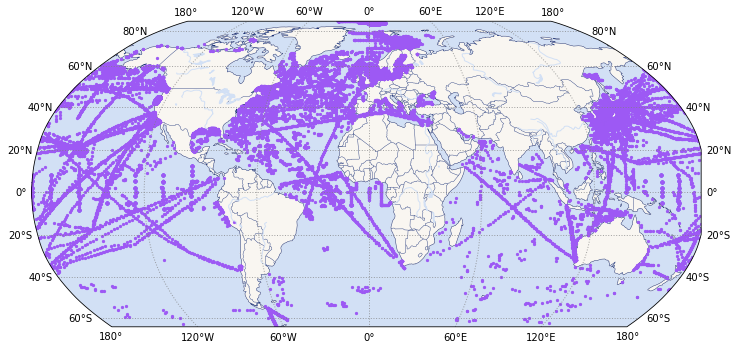

In [9]:
db_plt.plot_points(df_casts)

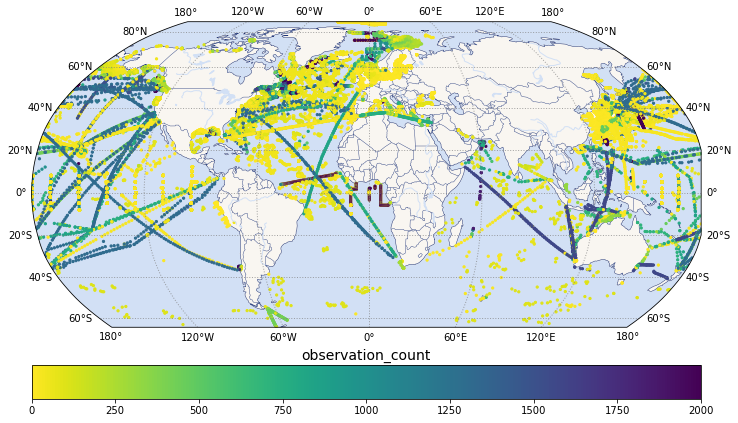

In [10]:
db_plt.plot_points(
    df_casts, col="observation_count", cmap="viridis_r", vrange=[0, 2000]
)

#### We can also plot a subset as an interactive plot (Will show only when cell is run)

In [11]:
db.plot(df_casts.iloc[0:100])

{"initialViewState": {"latitude": 0, "longitude": 0, "zoom": 1}, "layers": [{"@@type": "PointCloudLayer", "autoHighlight": true, "data": [{"cast_id": 10152199, "country": "JAPAN", "exploration_tool": "xbt", "geometry": {"coordinates": [134.1666717529297, 32.46666717529297], "type": "Point"}, "institute": "JAPANESE MARITIME SELF DEFENSE FORCE", "latitude": 32.46666717529297, "longitude": 134.1666717529297, "observation_count": 26, "platform": null, "project": null, "time": "2000-06-01 00:00:00", "timestamp": {}, "wod_cast_index": 18467, "wod_cruise_identifier": null, "wod_dataset_id": "/nodc/data/oc5.clim.4/wod_update_nc/2000/wod_xbt_2000.nc", "year": 2000}, {"cast_id": 10313844, "country": "JAPAN", "exploration_tool": "drb", "geometry": {"coordinates": [-30.386550903320312, 89.1875991821289], "type": "Point"}, "institute": null, "latitude": 89.1875991821289, "longitude": -30.386550903320312, "observation_count": 4, "platform": null, "project": "NORTH POLE ENVIRONMENTAL OBSERVATORY (NPEO)", "time": "2000-06-01 00:00:00", "timestamp": {}, "wod_cast_index": 3296, "wod_cruise_identifier": "JP030935", "wod_dataset_id": "/nodc/data/oc5.clim.4/wod_update_nc/2000/wod_drb_2000.nc", "year": 2000}, {"cast_id": 9144211, "country": "FRANCE", "exploration_tool": "mrb", "geometry": {"coordinates": [-10.0, -6.010000228881836], "type": "Point"}, "institute": null, "latitude": -6.010000228881836, "longitude": -10.0, "observation_count": 11, "platform": "FIXED PLATFORM", "project": "PIRATA BUOY ARRAY", "time": "2000-06-01 00:00:00", "timestamp": {}, "wod_cast_index": 17004, "wod_cruise_identifier": "FR014385", "wod_dataset_id": "/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_update_nc/May2021/2000/wod_mrb_2000.nc", "year": 2000}, {"cast_id": 9144273, "country": "BRAZIL", "exploration_tool": "mrb", "geometry": {"coordinates": [-38.02000045776367, 14.979999542236328], "type": "Point"}, "institute": null, "latitude": 14.979999542236328, "longitude": -38.02000045776367, "observation_count": 11, "platform": "FIXED PLATFORM", "project": "PIRATA BUOY ARRAY", "time": "2000-06-01 00:00:00", "timestamp": {}, "wod_cast_index": 17003, "wod_cruise_identifier": "BR001180", "wod_dataset_id": "/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_update_nc/May2021/2000/wod_mrb_2000.nc", "year": 2000}, {"cast_id": 9144266, "country": "BRAZIL", "exploration_tool": "mrb", "geometry": {"coordinates": [-34.9900016784668, 0.0], "type": "Point"}, "institute": null, "latitude": 0.0, "longitude": -34.9900016784668, "observation_count": 11, "platform": "FIXED PLATFORM", "project": "PIRATA BUOY ARRAY", "time": "2000-06-01 00:00:00", "timestamp": {}, "wod_cast_index": 17002, "wod_cruise_identifier": "BR001179", "wod_dataset_id": "/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_update_nc/May2021/2000/wod_mrb_2000.nc", "year": 2000}, {"cast_id": 9144265, "country": "FRANCE", "exploration_tool": "mrb", "geometry": {"coordinates": [-9.949999809265137, -9.989999771118164], "type": "Point"}, "institute": null, "latitude": -9.989999771118164, "longitude": -9.949999809265137, "observation_count": 9, "platform": "FIXED PLATFORM", "project": "PIRATA BUOY ARRAY", "time": "2000-06-01 00:00:00", "timestamp": {}, "wod_cast_index": 17001, "wod_cruise_identifier": "FR013662", "wod_dataset_id": "/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_update_nc/May2021/2000/wod_mrb_2000.nc", "year": 2000}, {"cast_id": 9144235, "country": "FRANCE", "exploration_tool": "mrb", "geometry": {"coordinates": [-23.010000228881836, -0.009999999776482582], "type": "Point"}, "institute": null, "latitude": -0.009999999776482582, "longitude": -23.010000228881836, "observation_count": 10, "platform": "FIXED PLATFORM", "project": "PIRATA BUOY ARRAY", "time": "2000-06-01 00:00:00", "timestamp": {}, "wod_cast_index": 17000, "wod_cruise_identifier": "FR014546", "wod_dataset_id": "/nodc/data/OCLAB/OCL/retrieval/monthlies/wod_update_nc/May2021/2000/wod_mrb_2000.nc", "year": 2000}, {"cast_id": 17131084, "country": "UNITED STATES", "exp

## Pulling data - <span style='color:#FE774C'> **World Ocean Database** </span> -- Variable Measurements

#### Insert the name of the table you are interested in
#### Here let's look at the WOD measurements. We will try out the 'poly' input where we input a polygon of our area of interest. 

Let's define our own polygon

In [12]:
poly = "POLYGON ((3.0 51.0, 20 51, 20 80, 3 80, 3 51))"

In [13]:
df_meas = db.query(
    "World Ocean Database Measurements",
    date_from="2000-06-01",
    date_to="2000-06-30",
    poly=poly,
)

In [14]:
df_meas.head()

,cast_id,timestamp,geometry,year,z,z_flag,oxygen,oxygen_flag,temperature,temperature_flag,...,nitrate_flag,ph,ph_flag,phosphate,phosphate_flag,silicate,silicate_flag,alkalinity,alkalinity_flag,measurement_id
0,11421062,2000-06-27 07:57:59.999,POINT Z (4.83200 65.00130 27.72364),2000,27.723639,0,NaN,NaN,9.0497,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49053087775588376
1,11421062,2000-06-27 07:57:59.999,POINT Z (4.83200 65.00130 71.28175),2000,71.281754,0,NaN,NaN,8.0686,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49053087775588420
2,11421062,2000-06-27 07:57:59.999,POINT Z (4.83200 65.00130 72.27161),2000,72.271606,0,NaN,NaN,8.0520,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49053087775588421
3,11421062,2000-06-27 07:57:59.999,POINT Z (4.83200 65.00130 73.26145),2000,73.261452,0,NaN,NaN,8.0245,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49053087775588422
4,11421062,2000-06-27 07:57:59.999,POINT Z (4.83200 65.00130 74.25129),2000,74.251289,0,NaN,NaN,7.9924,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49053087775588423


### <span style='color:#9D59F4'> **Plot the data** </span> using built-in functions
Here we create a static plot of measurment points and color by 'temperature'

In [15]:
plot_points(df_meas, col="temperature", cmap="viridis_r")

NameError: name 'plot_points' is not defined

#### Again, we can also create an interactive plot (will show only when cell is run)

In [ ]:
db.plot(df_meas, col="temperature")

#### AND we can also create an interactive 3D plot that shows depth (will show only when cell is run)

In [ ]:
plt.plot3d(df_meas, col="temperature")